## <font color = "Navy"> This notebook is a comprehensive program used to analyze several research questions and  build models to predict house prices

# <font color = "Teal "> Part 2 : Data Analysis

### <font color = 'teal'>Import required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression

import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings
from datetime import datetime
from statistics import mean
import time
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
warnings.filterwarnings("ignore")

### <font color = "teal"> Import data and prepare for Visualization

In [2]:
# Read the data
master_df = pd.read_csv("homes_clean_data.csv")

In [3]:
# Display the first 5 records
master_df.head()

City  Livability_Score Listing_Type      Price   Sq_Ft  \
0  South San Francisco                69       Condo    749000.0   935.0   
1  South San Francisco                69       House   1398000.0  1500.0   
2  South San Francisco                69       House    949000.0   800.0   
3  South San Francisco                69       House   1805000.0  2000.0   
4  South San Francisco                69       House    798000.0  1252.0   

   Beds  Baths  Estimated_monthly_payment Crime Employment  ... Utilities  \
0     1      1                       3537    C+         C+  ...         3   
1     3      2                       6603    C+         C+  ...         1   
2     2      1                       4482    C+         C+  ...         4   
3     4      3                       8525    C+         C+  ...         2   
4     2      2                       3769    C+         C+  ...         2   

  Kitchen_Features  HOA Parking Garage Pool  Laundry  Pets_Allowed  State  \
0                0   No     Yes    Yes   No       No            No     CA   
1                2  Yes      No     No  Yes       No            No     CA   
2                0   No     Yes    Yes   No       No            No     CA   
3                2   No      No     No   No      Yes            No     CA   
4                0   No      No     No   No      Yes            No     CA   

   Zipcode  
0    94080  
1    94080  
2    94080  
3    94080  
4    94080  

[5 rows x 31 columns]

In [4]:
# Display the column names.
master_df.columns

Index(['City', 'Livability_Score', 'Listing_Type', 'Price', 'Sq_Ft', 'Beds',
       'Baths', 'Estimated_monthly_payment', 'Crime', 'Employment', 'Housing',
       'Schools', 'User_Ratings', 'Address_Line_1', 'Agent_Name',
       'Agent_Company', 'Airports', 'Colleges', 'Military_Bases',
       'Shopping_Centers', 'Parks_and_Recreation', 'Utilities',
       'Kitchen_Features', 'HOA', 'Parking', 'Garage', 'Pool', 'Laundry',
       'Pets_Allowed', 'State', 'Zipcode'],
      dtype='object')

In [5]:
# Drop unnecessary columns which are not required for visualization
data_for_model = master_df.drop(["State", "Zipcode", "Address_Line_1", "Agent_Name", "Agent_Company"], axis = 1)

In [6]:
data_for_model.columns

Index(['City', 'Livability_Score', 'Listing_Type', 'Price', 'Sq_Ft', 'Beds',
       'Baths', 'Estimated_monthly_payment', 'Crime', 'Employment', 'Housing',
       'Schools', 'User_Ratings', 'Airports', 'Colleges', 'Military_Bases',
       'Shopping_Centers', 'Parks_and_Recreation', 'Utilities',
       'Kitchen_Features', 'HOA', 'Parking', 'Garage', 'Pool', 'Laundry',
       'Pets_Allowed'],
      dtype='object')

In [7]:
# Shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [8]:
# Deal with Missing values
data_for_model.isna().sum()
data_for_model.dropna(how = "any", inplace = True)

In [9]:
# Deal with Outliers
outlier_investigation = data_for_model.describe()

outlier_columns = ["Price", "Sq_Ft", "Estimated_monthly_payment"]

In [10]:
# Boxplot approach
for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(0.25)
    upper_quartile = data_for_model[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2 
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    data_for_model.drop(outliers, inplace = True) 

8 outliers detected in column Price
0 outliers detected in column Sq_Ft
0 outliers detected in column Estimated_monthly_payment


## <font color = 'RebeccaPurple '> Data Visualization

### <font color = 'RebeccaPurple '> Research Question 1 :

###  <font color = 'RebeccaPurple '>How much space do we get for the lowest price and What is the price of the smallest space?

In [11]:
# Define important variables required for analysis

mean_sqft = data_for_model["Sq_Ft"].mean()
mean_price = data_for_model["Price"].mean()

min_sqft = data_for_model["Sq_Ft"].min()
min_price = data_for_model["Price"].min()

max_sqft = data_for_model["Sq_Ft"].max()
max_price = data_for_model["Price"].max()

max_sqft_loc = data_for_model.loc[[data_for_model[["Sq_Ft"]].idxmax()[0]]]
max_price_loc = data_for_model.loc[[data_for_model[["Price"]].idxmax()[0]]]

min_sqft_loc = data_for_model.loc[[data_for_model[["Sq_Ft"]].idxmin()[0]]]
min_price_loc = data_for_model.loc[[data_for_model[["Price"]].idxmin()[0]]]

price_at_max_sqft = max_sqft_loc["Price"].iloc[0]
sqft_at_max_price = max_price_loc["Sq_Ft"].iloc[0]

price_at_min_sqft = min_sqft_loc["Price"].iloc[0]
sqft_at_min_price = min_price_loc["Sq_Ft"].iloc[0]

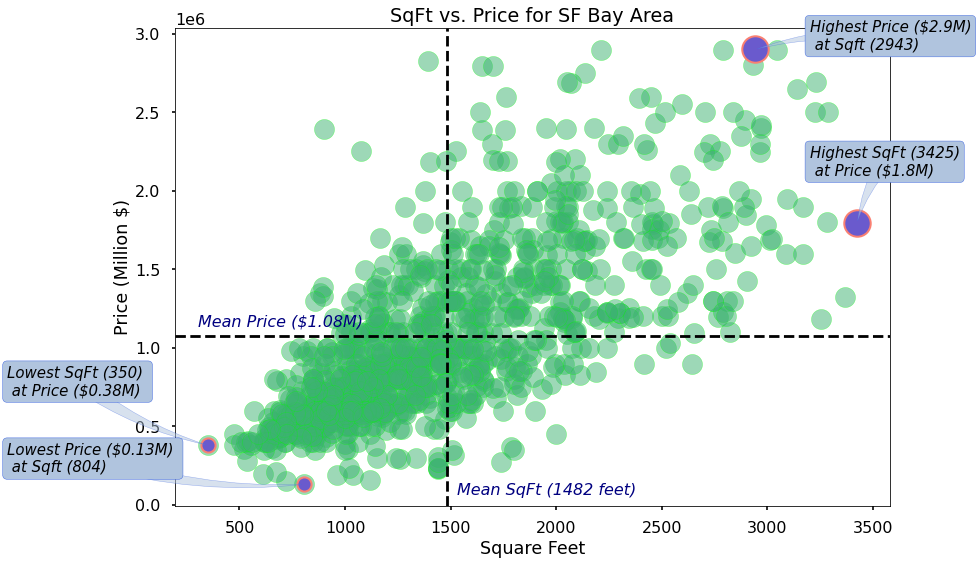

In [12]:
# Scatter plot visual for Research Question 1 

plt.style.use("seaborn-poster")
plt.scatter(data_for_model["Sq_Ft"],
            data_for_model["Price"],
            color = "mediumseagreen",
            edgecolor = "lime",
            s = 400, alpha = 0.5) # s for size of datapoints

plt.scatter(max_sqft_loc["Sq_Ft"],
            max_sqft_loc["Price"],
            color = "slateblue",
            s = 700,
            alpha = 1.0,
            edgecolor = "salmon",
            linewidth = 2) 

plt.scatter(max_price_loc["Sq_Ft"],
            max_price_loc["Price"],
            color = "slateblue",
            s = 700,
            alpha = 1.0,
            edgecolor = "salmon",
            linewidth = 2) 

plt.scatter(min_sqft_loc["Sq_Ft"],
            min_sqft_loc["Price"],
            color = "slateblue",
            s = 200,
            alpha = 1.0,
            edgecolor = "salmon",
            linewidth = 2) 

plt.scatter(min_price_loc["Sq_Ft"],
            min_price_loc["Price"],
            color = "slateblue",
            s = 200,
            alpha = 1.0,
            edgecolor = "salmon",
            linewidth = 2) 

plt.title("SqFt vs. Price for SF Bay Area")
plt.xlabel("Square Feet")
plt.ylabel("Price (Million $)")
plt.axvline(x = mean_sqft,
           color = "black",
           linestyle = "--")
plt.axhline(y = mean_price,
           color = "black",
           linestyle = "--")


plt.annotate(text = f"Mean SqFt ({round(mean_sqft)} feet)",
             xy = (mean_sqft, min_price),
             xytext = (10, -10),
             style = 'italic',
             textcoords = "offset pixels", # offsets texts
             fontsize = 16,
             color = "navy")

plt.annotate(text = f"Mean Price (${round(mean_price/1000000, 2)}M)",
             xy = (min_sqft, mean_price),
             xytext = (-10, 10),
             style = 'italic',
             textcoords = "offset pixels", # offsets texts
             fontsize = 16,
             color = "navy")

plt.annotate(text = f"Highest SqFt ({round(max_sqft)})\n at Price (${round(price_at_max_sqft/1000000, 2)}M)",
             xy = (max_sqft_loc["Sq_Ft"], max_sqft_loc["Price"]),
             xytext = (3200, 2100000),
             style = 'italic',
             fontsize = 15,
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "lightsteelblue", # fill color
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "lightsteelblue",
                               ec = "royalblue",
                               patchA = None, #  arrow right up against the box without any box
                               alpha = 0.5,
                               connectionstyle = "arc3,rad=0.1" )) # dictating the shape and the curve of the connector arrow


plt.annotate(text = f"Highest Price (${round(max_price/1000000, 2)}M)\n at Sqft ({round(sqft_at_max_price)})",
             xy = (max_price_loc["Sq_Ft"], max_price_loc["Price"]),
             xytext = (3200, 2900000),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "lightsteelblue", # fill color
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "lightsteelblue",
                               ec = "royalblue",
                               patchA = None, # arrow right up against the box without any box
                               alpha = 0.5,
                               connectionstyle = "arc3,rad=0.1" )) # dictating the shape and the curve of the connector arrow



plt.annotate(text = f"Lowest SqFt ({round(min_sqft)}) \n at Price (${round(price_at_min_sqft/1000000, 2)}M)",
             xy = (min_sqft_loc["Sq_Ft"], min_sqft_loc["Price"]),
             xytext = (-600, 700000),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "lightsteelblue", # fill color
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "lightsteelblue",
                               ec = "royalblue",
                               patchA = None, # arrow right up against the box without any box,
                               alpha = 0.5,
                               connectionstyle = "arc3,rad=0.1" )) # dictating the shape and the curve of the connector arrow


plt.annotate(text = f"Lowest Price (${round(min_price/1000000, 2)}M) \n at Sqft ({round(sqft_at_min_price)})",
             xy = (min_price_loc["Sq_Ft"], min_price_loc["Price"]),
             xytext = (-600, 210000),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "lightsteelblue", # fill color
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "lightsteelblue",
                               ec = "royalblue",
                               patchA = None, 
                               alpha = 0.5,
                               connectionstyle = "arc3,rad=0.1" ))
plt.show()

## <font color = 'RebeccaPurple '>Research Question 2 :

### <font color = 'RebeccaPurple '> What is the price range of different types of properties?

In [13]:
data_for_model[["Listing_Type"]].value_counts()

Listing_Type 
House            724
Condo            200
Townhouse         47
Manufactured      21
dtype: int64

In [14]:
# Create new dataframes required 

house = data_for_model[data_for_model["Listing_Type"] == "House "]
condo = data_for_model[data_for_model["Listing_Type"] == "Condo "]
townhouse = data_for_model[data_for_model["Listing_Type"] == "Townhouse "]
manufactured = data_for_model[data_for_model["Listing_Type"] == "Manufactured "]

In [15]:
# Define important variables required for annotations

house_min_price = round(house["Price"].min() /1000000, 2)
house_max_price = round(house["Price"].max() /1000000, 2)

condo_min_price = round(condo["Price"].min() /1000000, 2)
condo_max_price = round(condo["Price"].max() /1000000, 2)

townhouse_min_price = round(townhouse["Price"].min() /1000000, 2)
townhouse_max_price = round(townhouse["Price"].max() /1000000, 2)

manufactured_min_price = round(manufactured["Price"].min() /1000000, 2)
manufactured_max_price = round(manufactured["Price"].max() /1000000, 2)

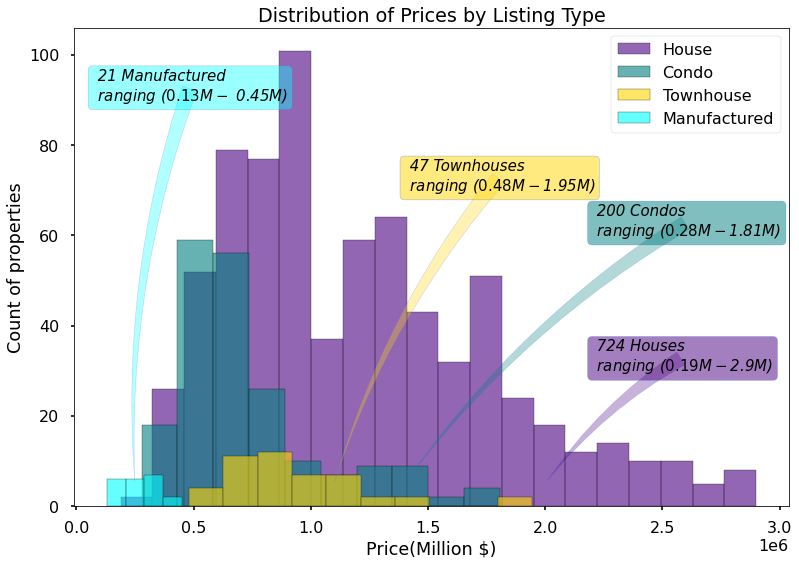

In [16]:
# Histogram visualization for Research Question 2

plt.style.use("seaborn-poster") 

plt.ylabel("Count of properties")
# Houses
plt.hist(house["Price"], bins = 20, edgecolor = "black", alpha = 0.6,
         color = "indigo", label = "House")

plt.plot([2000000], [5], '-')
plt.annotate(text = f" {round(house.shape[0])} Houses \n ranging (${house_min_price}M - ${house_max_price}M)",
             xy = (2000000, 5),
             xytext = (2200000, 30),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "indigo", # fill color
                         alpha = 0.5,
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "indigo",
                               alpha = 0.3,
                               ec = "royalblue",
                               patchA = None, 
                               connectionstyle = "arc3,rad=0.1" ))

# Condos
plt.hist(condo["Price"], bins = 10, edgecolor = "black", alpha = 0.6,
         color = "teal", label = "Condo")

plt.plot([1400000], [5], '-')
plt.annotate(text = f" {round(condo.shape[0])} Condos \n ranging (${condo_min_price}M - ${condo_max_price}M)",
             xy = (1400000, 5),
             xytext = (2200000, 60),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "teal", # fill color
                         alpha = 0.5,
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "teal",
                               alpha = 0.3,
                               ec = "royalblue",
                               patchA = None, 
                               connectionstyle = "arc3,rad=0.1" ))

# Townhouses
plt.hist(townhouse["Price"], bins = 10, edgecolor = "black", alpha = 0.6,
         color = "gold", label = "Townhouse")

plt.plot([1100000], [5], '-')
plt.annotate(text = f" {round(townhouse.shape[0])} Townhouses \n ranging (${townhouse_min_price}M - ${townhouse_max_price}M)",
             xy = (1100000, 5),
             xytext = (1400000, 70),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "gold", # fill color
                         alpha = 0.5,
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "gold",
                               alpha = 0.3,
                               ec = "royalblue",
                               patchA = None, 
                               connectionstyle = "arc3,rad=0.1" ))

# Manufactured
plt.hist(manufactured["Price"], bins = 4, edgecolor = "black", alpha = 0.6,
         color = "cyan", label = "Manufactured")

plt.plot([250000], [5], '-')
plt.annotate(text = f" {round(manufactured.shape[0])} Manufactured \n ranging (${manufactured_min_price}M - $ {manufactured_max_price}M)",
             xy = (250000, 5),
             xytext = (70000, 90),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "cyan", # fill color
                         alpha = 0.4,
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "cyan",
                               alpha = 0.3,
                               ec = "royalblue",
                               patchA = None, 
                               connectionstyle = "arc3,rad=0.1" ))
plt.title("Distribution of Prices by Listing Type")
plt.xlabel("Price(Million $)")


plt.legend()
plt.show()

## <font color = 'RebeccaPurple '> Research Question 3:

### <font color = 'RebeccaPurple '>Which  are the cities with low crime rate,  high employment, good schools nearby and house price less than the average Price.

### <font color = 'RebeccaPurple '>Customer needs minimum of 2 Beds and 2 Baths . It would be good to have Parking, Garage & Laundry

In [17]:
# Create new dataframe required 

shortlist_2bed_2bath = data_for_model.loc[(data_for_model["Beds"] >= 2) &
                          (data_for_model["Baths"] >= 2) &
                           (data_for_model["Price"] <= data_for_model["Price"].mean()) &
                           (data_for_model["Crime"].isin(['A', 'A+', 'A-', 'B-'])) &
                            (data_for_model["Schools"].isin(['A', 'A+', 'A-', 'B-'])) &
                           (data_for_model["Parking"] == "Yes") &
                           (data_for_model["Garage"] == "Yes") &
                           (data_for_model["Laundry"] == "Yes")]
                           #(data_for_model["Pets_Allowed"] == "Yes")]

In [18]:
# Create a list of cities that satifies the customer requirement

city_list = sorted(shortlist_2bed_2bath["City"].unique())

In [19]:
# Create a list of property types available in the selected cities

prop_list = sorted(shortlist_2bed_2bath["Listing_Type"].unique())

In [20]:
# Create a dataframe

shortlist_plot = pd.DataFrame(columns = prop_list ) 
shortlist_plot.insert(0, "City", city_list)

In [21]:
# Insert values from the shortlisted dataframe to the new dataframe
i = 0
for prop in prop_list:
    while i < len(city_list): 
        if shortlist_plot["City"].values[i] == city_list[i]:
            val = shortlist_2bed_2bath.loc[(shortlist_2bed_2bath["Listing_Type"] == prop) & (shortlist_2bed_2bath["City"] == shortlist_plot["City"].values[i])].shape[0]
            if shortlist_plot["City"][i] == city_list[i]:
                shortlist_plot[prop][i] = val
            else:
                shortlist_plot[prop] = 0
        i += 1
    i = 0  

In [22]:
shortlist_plot

City Condo  House  Townhouse 
0    Danville      1      1          3
1     Fremont      7      3          3
2  Pleasanton      0      0          4
3   San Ramon      3      1          1

In [23]:
# Reset index values to Cities
shortlist_plot.set_index('City', inplace = True)

In [24]:
# Convert object to int datatype
for col in shortlist_plot.columns.to_list():
    shortlist_plot[col] = shortlist_plot[col].astype(int)

In [25]:
# Introdue a Row_total column for plotting Stacked Bar Plot
shortlist_plot.loc[:, "Row_Total"] = shortlist_plot.sum(numeric_only = True, axis = 1)
shortlist_plot

Condo   House   Townhouse   Row_Total
City                                             
Danville         1       1           3          5
Fremont          7       3           3         13
Pleasanton       0       0           4          4
San Ramon        3       1           1          5

In [26]:
# Sort the values
shortlist_plot = shortlist_plot.sort_values("Row_Total")
shortlist_plot

Condo   House   Townhouse   Row_Total
City                                             
Pleasanton       0       0           4          4
Danville         1       1           3          5
San Ramon        3       1           1          5
Fremont          7       3           3         13

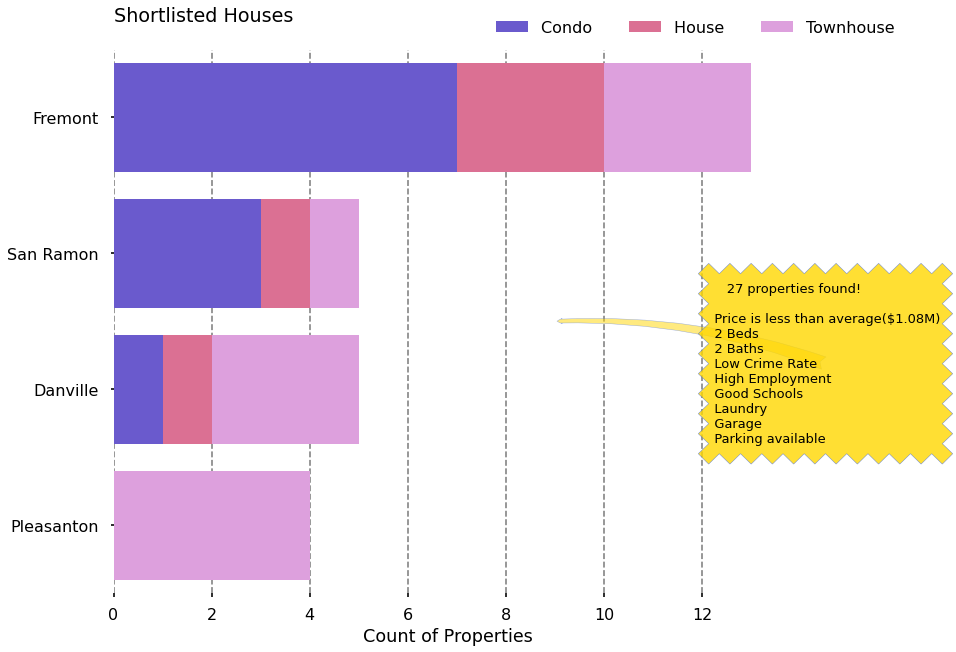

In [27]:
# Stacked Bar Plot for Research Question 3

fields = prop_list
colors = ['slateblue', 'palevioletred', 'plum', 'lightcoral']
labels = prop_list
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(shortlist_plot) * [0]
for idx, name in enumerate(fields):
    plt.barh(shortlist_plot.index, shortlist_plot[name], left = left, color=colors[idx])
    left = left + shortlist_plot[name]
# title, legend, labels
plt.title('Shortlisted Houses\n', loc = 'left')
plt.legend(labels, bbox_to_anchor = ([0.55, 1, 0, 0]), ncol = 3, frameon=False)
plt.xlabel('Count of Properties')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.plot([5], [1], '-')
plt.annotate(text = f" \n      {shortlist_2bed_2bath.shape[0]} properties found! \n\n   Price is less than average(${round(mean_price/1000000,2)}M)  \n   2 Beds  \n   2 Baths  \n   Low Crime Rate  \n   High Employment  \n   Good Schools  \n   Laundry  \n   Garage  \n   Parking available \n ",
             xy = (9, 1.5),
             xytext = (12, 0.5),
             fontsize = 13,
             bbox = dict(boxstyle = "sawtooth, tooth_size = 0.8", # bounding box
                         fc = "gold", # fill color
                         alpha = 0.8,
                         ec = "royalblue"), # edge color
             arrowprops = dict(arrowstyle = "fancy,tail_width=1.", # arrow style
                               fc = "gold",
                               alpha = 0.5,
                               ec = "royalblue",
                               patchA = None, 
                               connectionstyle = "arc3,rad=0.1" ))
plt.show()


## <font color = 'RebeccaPurple '> Research Question 4 :

### <font color = 'RebeccaPurple '>What is the Average housing price for 2 bedrooms and 2 bathrooms in the bay area?

In [28]:
homes = pd.read_csv('homes_clean_data.csv')
avg_bed2_bath2 = homes[(homes['Beds'] == 2) & (homes['Baths'] == 2)]
print('The number of houses with 2 bedrooms and 2 bathrooms:', avg_bed2_bath2.shape[0])
#average the housing price for 2 bedrooms and 2 bathrooms
avg_bed2_bath2_price= avg_bed2_bath2.Price.mean()
def my_value(number):
    return ("{:,.0f}".format(number))
print('The average price of a house with 2 bedrooms and 2 bathrooms in the bay area is $', my_value(avg_bed2_bath2_price))

The number of houses with 2 bedrooms and 2 bathrooms: 166
The average price of a house with 2 bedrooms and 2 bathrooms in the bay area is $ 830,750


## <font color = 'RebeccaPurple '> Research Question 5 :

### <font color = 'RebeccaPurple '> What is the Average housing price for 2 bedrooms and 2 bathrooms in the bay area by Listing Type ?

In [29]:
prices = avg_bed2_bath2[['Listing_Type','Price']].groupby(['Listing_Type']).mean().reset_index()
prices = round(prices.sort_values(by='Price', ascending=False),1)
display(prices)
fig = ex.bar(data_frame=prices,x='Listing_Type',y='Price',hover_data=['Listing_Type','Price'],color ='Listing_Type',labels={'Listing_Type':'Listing_Type','price':'Average Price'},
title = 'Average price for 2 bedrooms and 2 bathrooms houses by home type')
fig.update_layout(width = 650,height = 500,title_x = 0.5)

Listing_Type     Price
1         House   953899.3
0         Condo   760339.9
3     Townhouse   721800.0
2  Manufactured   230483.3

### <font color = 'darkgreen'>                  Inference: 
  <font color= "darkgreen"> 
      <li> A home type for 2 beds and 2 baths house costs on average ~ 1 million dollars</li>
  <li>Following are Townhouse and condo for approximately 0.75  million dollars, respectively for 2 beds and 2 baths</li> 

## <font color = 'RebeccaPurple '> Research Question 6 :

### <font color = 'RebeccaPurple '> What is Average housing price for 2 bedrooms and 2 bathrooms in the bay area by cities?

In [30]:
cites_prices_avg = avg_bed2_bath2[['City','Price']].groupby(['City']).mean().reset_index()
cites_prices_avg = cites_prices_avg.sort_values(by='Price', ascending=False)

# Plotting average price for 2 bedroom and 2 bathroom for each city
fig = ex.bar(data_frame=cites_prices_avg,x='City',y='Price',hover_data=['City','Price'],color ='Price',
             labels={'city':'City','price':'Average Price(in $M)'},
title = 'Average price for Bedrooms:2 and Bathrooms:2 in different cities in Bay Area ')
fig.update_layout(width = 1000,height = 500,title_x = 0.5)
fig.show()

In [31]:
#Dataframe of average price for 2 bedroom and 2 bathrom
cites_prices_avg.loc[:, "Price"] = cites_prices_avg["Price"].map('{:,.0f}'.format)
cites_prices_avg = cites_prices_avg.rename(columns={'Price':"Avg Price"})
cites_prices_avg

City  Avg Price
1            Burlingame  1,636,571
10            Palo Alto  1,410,498
3             Cupertino  1,382,259
4              Danville  1,145,000
13            San Mateo  1,013,859
11           Pleasanton    965,400
17           Union City    950,000
15          Santa Clara    825,390
8              Milpitas    799,000
0              Berkeley    798,000
6               Fremont    777,120
5                Dublin    749,000
12             San Jose    741,016
16  South San Francisco    732,000
2         Castro Valley    729,000
9               Oakland    728,541
14            San Ramon    700,000
7               Hayward    529,545

### <font color = 'darkgreen'>Inference :
    
<font color = 'darkgreen'> 
    <li>Burlingame,Palo Alto,Cupertino San Mateo & Cupertino are the most expensive cities in  bay area to buy 2 beds & 2 baths house.</li>
<li> Hayward is the cheapest citie for buying 2 beds and 2 baths house with the housing price `~half a million</li>

## <font color = 'RebeccaPurple '> Research Question 7 :

### <font color = 'RebeccaPurple '>What is Average Price of Homes in Different Cities in Bay Area ?

In [32]:
all_city_price = homes[['City','Price']]

price_ratings = round(homes.groupby('City', as_index=False)['Price'].mean(),2)
pricecity = price_ratings[['City','Price']].groupby(['City']).mean().reset_index()
pricecity = pricecity.sort_values(by='Price', ascending=False)

# Plotting average price for all houses for each city
fig = ex.bar(data_frame=pricecity,x='City',y='Price',hover_data=['City','Price'],color ='Price',labels={'city':'City','price':'Average Price(in $M)'},
title = 'Average price in different cities in the Bay Area ')
fig.update_layout(width = 1000,height = 500,title_x = 0.5)
fig.show()


## <font color = 'RebeccaPurple '> Research Question 8 : 

### <font color = 'RebeccaPurple '>What is impact of Crime Rates, School rating and employment opportunities  on housing prices in Bay Area?

In [33]:
# All the ratings are sorted from arder A+,A,A- .... D-,F
school = homes[['Price','Schools']].groupby(by='Schools').mean().reset_index().sort_values(by='Schools', key=lambda g: g + ',',ascending = True)
crime = homes[['Price','Crime']].groupby(by='Crime').mean().reset_index().sort_values(by='Crime', key=lambda g: g + ',',ascending = True)
employment = homes[['Price','Employment']].groupby(by='Employment').mean().reset_index().sort_values(by='Employment', key=lambda g: g + ',',ascending = True)#Subplotting data for better understanding
fig_school_crime_ratings = make_subplots(rows=1, cols=3, shared_yaxes=True,
                    subplot_titles=("School Ratings","Crime Ratings","Employment Ratings"))

fig_school_crime_ratings.add_trace(go.Bar(x=school['Schools'], y=school['Price'],
                    marker=dict(color=school['Price'],coloraxis="coloraxis")),
              1, 1)

fig_school_crime_ratings.add_trace(go.Bar(x=crime['Crime'], y=crime['Price'],
                    marker=dict(color=crime['Price'],coloraxis="coloraxis")),
              1, 2)

fig_school_crime_ratings.add_trace(go.Bar(x=employment['Employment'], y=employment['Price'],
                    marker=dict(color=employment['Price'],coloraxis="coloraxis")),
              1, 3)

fig_school_crime_ratings.update_layout(showlegend=False,yaxis = dict(title="Average Price (in $M)"),width = 1000,height = 450,
                 title = 'Housing Prices with respect to Crime, School Employment Ratings',title_x=0.5,title_y = 0.1)
fig_school_crime_ratings.show()


### <font color = 'darkgreen'> Analysis: 
<font color = 'darkgreen'> 
        <li> Cities & schools that have ratings in 'A+' have a higher price range of houses.</li><li>Areas with  'A+' & A-  Employment ratings have highest ranges of prices.</li>

## <font color = 'RebeccaPurple '>Research Question 9 :

### <font color = 'RebeccaPurple '>What are the cities with the lowest crime rate , highest school rating & highest employment opportunities?


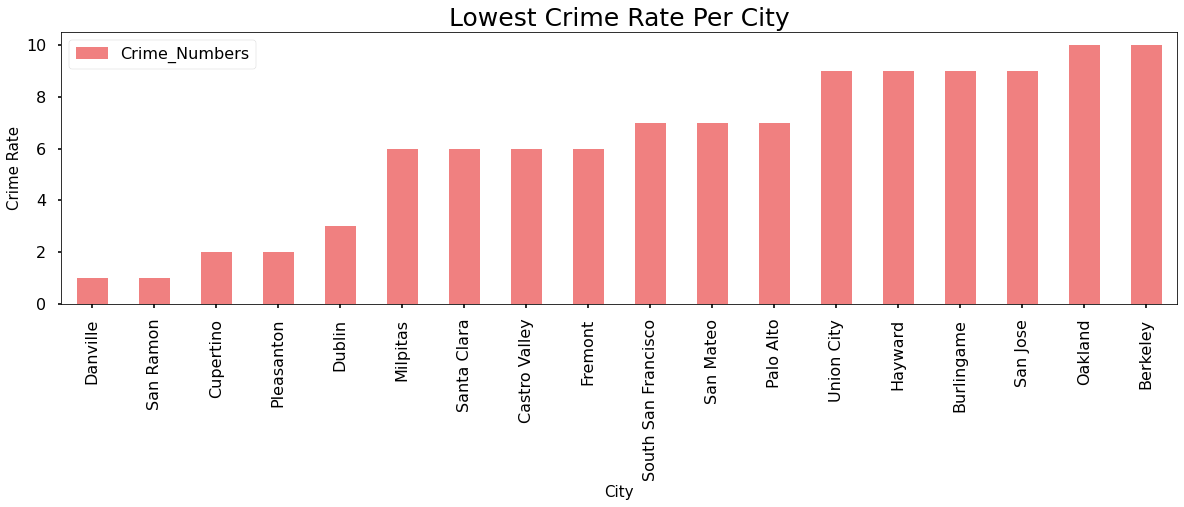

In [34]:
city_price_rating = round(homes.groupby('City', as_index=False)['Price'].mean(),2)
final_crime_school_employment_ratings_df = pd.merge(homes, city_price_rating, on='City')
final_crime_school_employment_ratings_df = final_crime_school_employment_ratings_df.rename(columns={"Price_y": "Avg_Price"})
final_crime_school_employment_ratings_df.index = final_crime_school_employment_ratings_df.index+1

#safest_city
label_dictionary={'A+':1.,'A':2.,'A-':3.,'B+':4.,'B':5.,'B-':6.,'C+':7.,'C':8.,'C-':9.,'D+':9.,'D':9.,'D-':9.,'F':10.,'None':np.nan}
final_crime_school_employment_ratings_df['Crime_Numbers']=final_crime_school_employment_ratings_df.Crime.apply(label_dictionary.get)

safest_crime_city = final_crime_school_employment_ratings_df[['Crime_Numbers','City']].groupby(['City']).mean()
safest_crime_city =safest_crime_city.sort_values(by='Crime_Numbers', ascending=True)

#Plot a histogram
safest_crime_city.plot.bar(figsize=(20,5), color = 'lightcoral')
plt.title('Lowest Crime Rate Per City',fontsize=25)
plt.ylabel('Crime Rate',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.xticks(rotation=90)
plt.show()

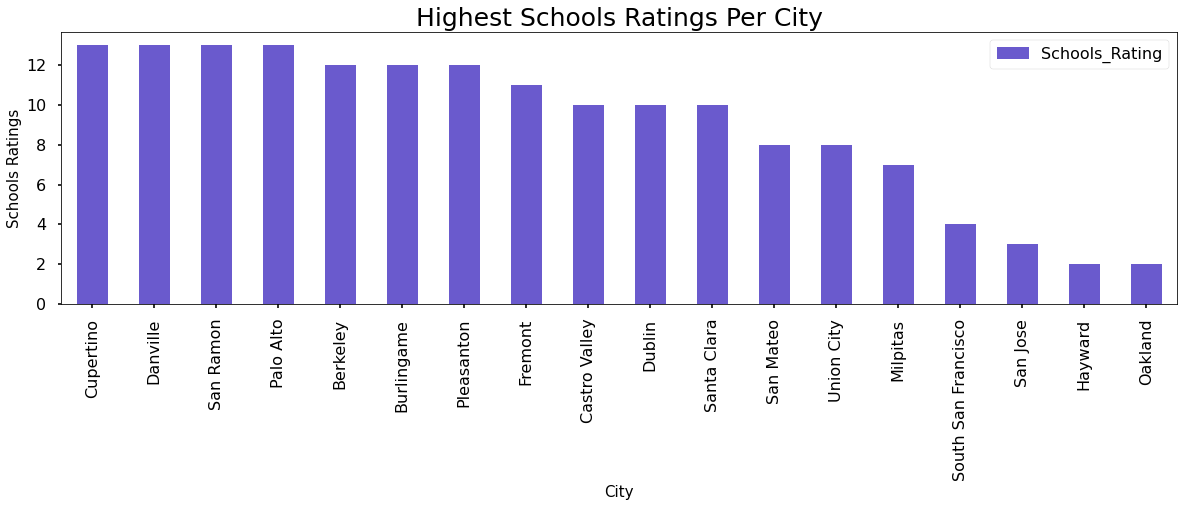

In [35]:
# Highest School Ratings
label_dict_school_employment={'A+':13.,'A':12.,'A-':11.,'B+':10.,'B':9.,'B-':8.,'C+':7.,'C':6.,'C-':5.,'D+':4.,'D':3.,'D-':2.,'F':1.,'None':np.nan}
final_crime_school_employment_ratings_df['Schools_Rating']=final_crime_school_employment_ratings_df.Schools.apply(label_dict_school_employment.get)

top_school = final_crime_school_employment_ratings_df[['Schools_Rating','City']].groupby(['City']).mean()
top_school =top_school.sort_values(by='Schools_Rating', ascending=False)

#Plot a histogram
top_school.plot.bar(figsize=(20,5), color = 'slateblue')
plt.title('Highest Schools Ratings Per City',fontsize=25)
plt.ylabel('Schools Ratings',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.xticks(rotation=90)
plt.show()

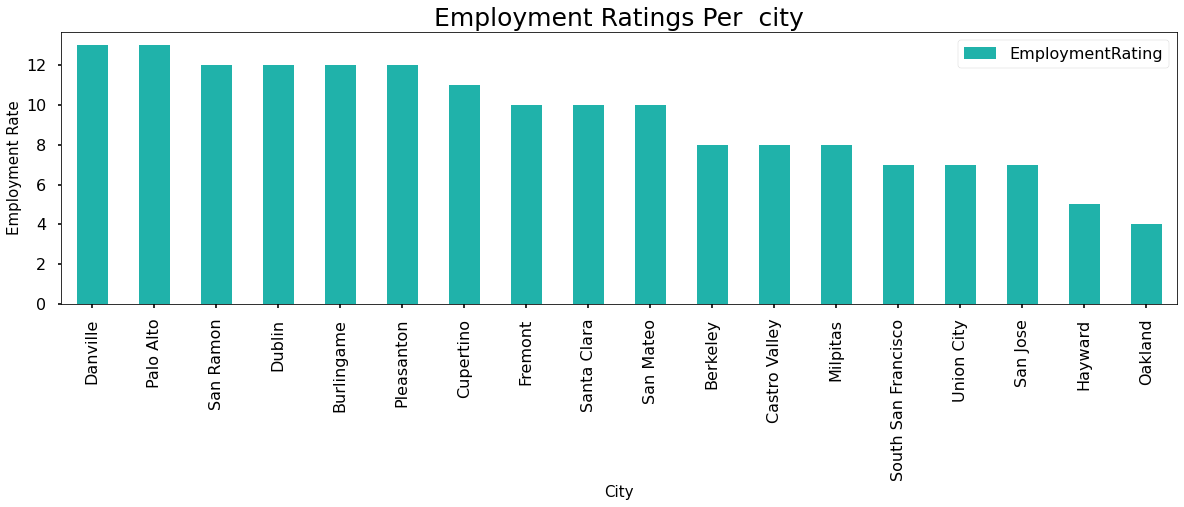

In [36]:
# Highest Employment Opportunities
final_crime_school_employment_ratings_df['EmploymentRating']=final_crime_school_employment_ratings_df.Employment.apply(label_dict_school_employment.get)

employees_rating = final_crime_school_employment_ratings_df[['EmploymentRating','City']].groupby(['City']).mean()
employees_rating =employees_rating.sort_values(by='EmploymentRating', ascending=False)

#Plot a histogram
employees_rating.plot.bar(figsize=(20,5), color = 'lightseagreen')
plt.title('Employment Ratings Per  city',fontsize=25)
plt.ylabel('Employment Rate',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## <font color = 'darkgreen'> Analysis:

<font color = 'darkgreen'> 
    <li> Danville, San Ramon,Cupertino,Pleasanton,Dublin  are the safest cities in the Bay Area</li><li>Cupertino,Danville,San Ramon,Palo Alto,Berkeley,Burlingame are the cities having top rated schools</li>
<li> Danville,San Ramon,Palo Alto,Burlingame,Dublin,Pleasanton  are the cities that have the highest Employment Rating</li>

## <font color = 'RebeccaPurple'>  Research Question 10: 

### <font color = 'RebeccaPurple'> How are properties distributed in different cities in bay area?

<AxesSubplot:title={'center':'Percentage of properties by City'}, ylabel='City'>

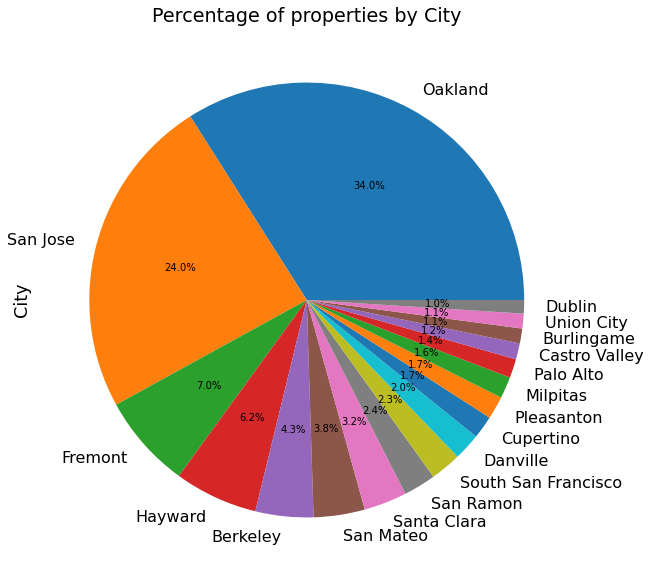

In [37]:
homes['City'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Percentage of properties by City',legend=False,figsize=(15,10))

## <font color = 'darkgreen'> Analysis
   <font color = 'darkgreen'> 
       <li>Highest Proeprties were found in Oakland followed by San Jose</li>

## <font color = 'RebeccaPurple'> Research question 11: 

### <font color = 'RebeccaPurple'>How is the relationship between number of bedrooms & Prices in Bay Area?

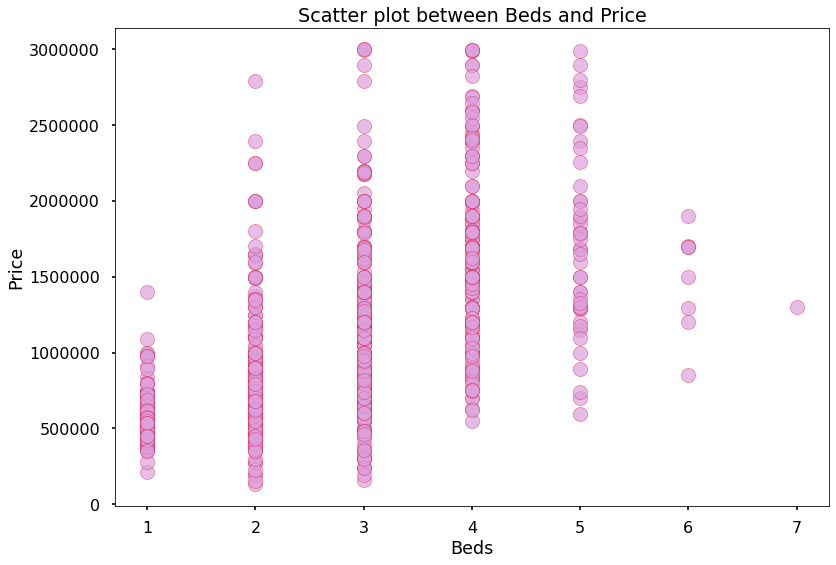

In [38]:
homes.plot.scatter(x='Beds', y='Price',s = 200,alpha = 0.7, ec = 'crimson', color = 'plum', title= "Scatter plot between Beds and Price").ticklabel_format(useOffset=False, style='plain')
#High prices are observed for house with beds between 3 to 5

### <font color = 'RebeccaPurple '> Correlation between Monthly estimated Payment and Price of the property

Text(0, 0.5, 'Price of the property')

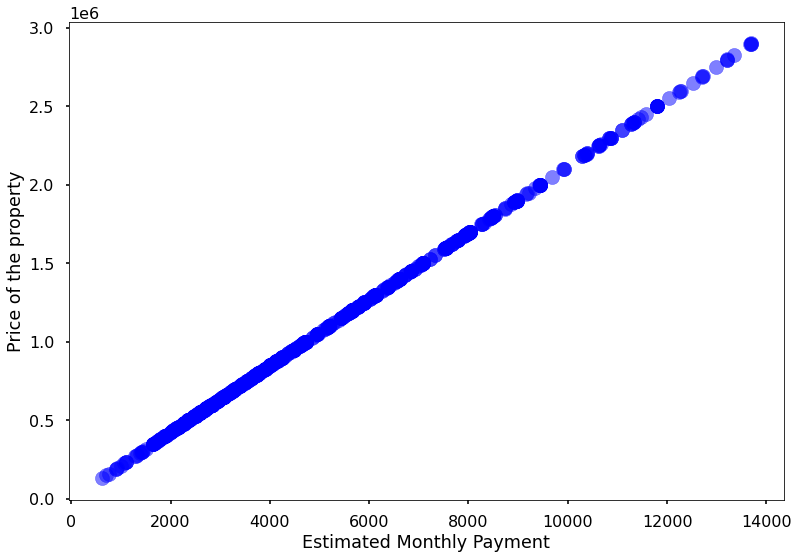

In [39]:
# Scatter plot for monthly estimated payment and Price
plt.style.use("seaborn-poster")
plt.scatter(data_for_model["Estimated_monthly_payment"],
            data_for_model["Price"],
            color = "blue",
            s = 200, alpha = 0.5),
plt.xlabel("Estimated Monthly Payment")
plt.ylabel("Price of the property")

# <font color = 'Seagreen'> Build Models for Prediction of Property Price

##### <font color = 'Seagreen'>Dropping Estimated Monthly Payment column from predictors as it is a calculated/derived value of Price. From the above graph, we see a perfect correlation between the two variables.

##### <font color = 'Seagreen'>The Price of all properties listed on homes.com are split into 212 Installments ~ 17.6 years which is Estimated Monthly Payment. Hence dropping this column

In [40]:
# Drop Estimated Monthly apyment and other unnecessary columns

data_for_model = master_df.drop(["Estimated_monthly_payment","State", "Zipcode", "Address_Line_1", 
                                 "Agent_Name", "Agent_Company"], axis = 1)

In [41]:
# Split input and output variables

X = data_for_model.drop(["Price"], axis = 1)
y = data_for_model["Price"]

In [42]:
# Encoding categorical variables 
ratings_dict = {'F':1,'D-':2,'D':3,'D+':4,'C-':5,'C':6,'C+':7,
                             'B-':8,'B':9,'B+':10,'A-':11,'A':12,'A+':13}

city_avgdf = master_df[['City','Price']].groupby(by = ['City']).mean().reset_index().sort_values(by = ['Price'])

city_avgdf['Ranks'] = city_avgdf['Price'].rank()

city_dict = dict(zip(city_avgdf.City.values,city_avgdf.Ranks.values.astype(int)))

In [43]:
X.Schools = X['Schools'].map(ratings_dict)
X.Crime = X['Crime'].map(ratings_dict)
X.Employment = X['Employment'].map(ratings_dict)
X.Housing = X['Housing'].map(ratings_dict)
X.User_Ratings = X['User_Ratings'].map(ratings_dict)
X.City = X['City'].map(city_dict)

In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# One- hot encoding for categorical variables
categorical_vars = ['Listing_Type', 'Parking','Garage','Pool','Laundry','Pets_Allowed','HOA']

one_hot_encoder = OneHotEncoder(sparse = False, drop = "first")

In [46]:
# Train the dataset using fit_transform
X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

In [47]:
# Convert to dataframe
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop = True), 
                   X_train_encoded.reset_index(drop = True)],
                  axis = 1)
X_train.drop(categorical_vars, axis = 1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop = True), 
                   X_test_encoded.reset_index(drop = True)],
                  axis = 1)
X_test.drop(categorical_vars, axis = 1, inplace = True)

# <font color = 'Seagreen'> Model 1

### <font color = 'Seagreen'> Select the optimal number of features using Recursive Feature elimination with Cross Validation

In [48]:
# Feature Selection using RFECV
regressor = LinearRegression() 
feature_selector = RFECV(regressor) 

In [49]:
fit = feature_selector.fit(X_train,y_train)

In [50]:
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

Optimal number of features: 26


In [51]:
X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]


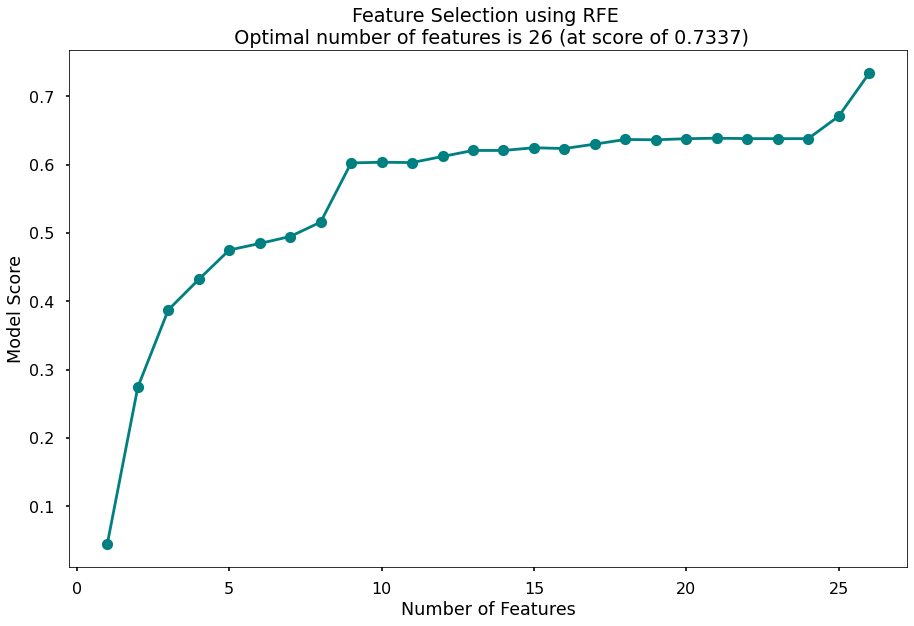

In [52]:
# A visual to understand the performance of a model as number of feature varies
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], color = 'teal', marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()

In [53]:
# Model Training
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict on the Test Set
y_pred = regressor.predict(X_test)

In [55]:
# Calculate R-Squared
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.6505367379728648


In [56]:
# Cross Validation
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean() 

0.7302733857935322

In [57]:
# Calculate Adjusted R-Squared
num_data_points, num_input_vars = X_test.shape
adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.5980162477260121


In [58]:
# Extract Model Co-efficients

coefficients = pd.DataFrame(regressor.coef_)
input_variable_names = pd.DataFrame(X_train.columns)
summary_stats = pd.concat([input_variable_names, coefficients], axis = 1)
summary_stats.columns = ["input_variable", "coefficient"]
summary_stats

input_variable    coefficient
0                         City   32661.217490
1             Livability_Score    1077.671741
2                        Sq_Ft     550.085495
3                         Beds   81621.419788
4                        Baths  -61592.603681
5                        Crime   10131.804421
6                   Employment  117785.057773
7                      Housing   -2082.470878
8                      Schools  -48273.063620
9                 User_Ratings  -21411.477964
10                    Airports   40901.943922
11                    Colleges   52442.755293
12              Military_Bases  119858.828170
13            Shopping_Centers   -4325.077429
14        Parks_and_Recreation   20728.798815
15                   Utilities   -5105.631880
16            Kitchen_Features   10424.662241
17         Listing_Type_House   173872.952042
18  Listing_Type_Manufactured  -690255.079505
19     Listing_Type_Townhouse    -2332.847188
20                 Parking_Yes   50740.919119
21                  Garage_Yes  -35152.836853
22                    Pool_Yes -176565.413400
23                 Laundry_Yes   38901.540096
24            Pets_Allowed_Yes   43324.457620
25                     HOA_Yes   83976.052719

In [59]:
# Extract Model Intercept
regressor.intercept_

-1056245.1211629908

### <font color = 'Seagreen'> The above model using Feature Selection with Cross Validation gave a prediction accuracy of 60% (Considering Adjusted Rsq value). We will look at model improvements

# <font color = 'Seagreen'> Model 2

### <font color = 'Seagreen'> Feature Selection using Univariate Testing

In [60]:
# Drop unnecessary columns

data_for_model = master_df.drop(["Estimated_monthly_payment","State", "Zipcode", "Address_Line_1", "Agent_Name", "Agent_Company"], axis = 1)

In [61]:
# Shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [62]:
# Deal with Missing values
data_for_model.isna().sum()
data_for_model.dropna(how = "any", inplace = True)

In [63]:
# Deal with Outliers
outlier_investigation = data_for_model.describe()

outlier_columns = ["Price", "Sq_Ft"]

In [64]:
# Boxplot approach
for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(0.25)
    upper_quartile = data_for_model[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2 
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    data_for_model.drop(outliers, inplace = True) 

8 outliers detected in column Price
0 outliers detected in column Sq_Ft


In [65]:
# Split input and output variables

X = data_for_model.drop(["Price"], axis = 1)
y = data_for_model["Price"]

In [66]:
# Encoding categorical variables 
ratings_dict = {'F':1,'D-':2,'D':3,'D+':4,'C-':5,'C':6,'C+':7,
                             'B-':8,'B':9,'B+':10,'A-':11,'A':12,'A+':13}

city_avgdf = master_df[['City','Price']].groupby(by = ['City']).mean().reset_index().sort_values(by = ['Price'])

city_avgdf['Ranks'] = city_avgdf['Price'].rank()

city_dict = dict(zip(city_avgdf.City.values,city_avgdf.Ranks.values.astype(int)))

In [67]:
X.Schools = X['Schools'].map(ratings_dict)
X.Crime = X['Crime'].map(ratings_dict)
X.Employment = X['Employment'].map(ratings_dict)
X.Housing = X['Housing'].map(ratings_dict)
X.User_Ratings = X['User_Ratings'].map(ratings_dict)
X.City = X['City'].map(city_dict)

In [68]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
# One hot encoding for categorical columns
categorical_vars = ['Listing_Type', 'Parking','Garage','Pool','Laundry','Pets_Allowed','HOA']

one_hot_encoder = OneHotEncoder(sparse = False, drop = "first")

In [70]:
# Train the dataset using fit_transform
X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

In [71]:
# Create a dataframe
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop = True), 
                   X_train_encoded.reset_index(drop = True)],
                  axis = 1)
X_train.drop(categorical_vars, axis = 1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop = True), 
                   X_test_encoded.reset_index(drop = True)],
                  axis = 1)
X_test.drop(categorical_vars, axis = 1, inplace = True)

In [72]:
# Feature Selection
feature_selector = SelectKBest(f_regression, k = "all") 
# fit method calculates the relationship scores for each input variable
fit = feature_selector.fit(X_train, y_train) 

In [73]:
# Creating Dataframe with these information
p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_varaiable_names = pd.DataFrame(X_train.columns)
summary_stats = pd.concat([input_varaiable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
# Sort the values 
summary_stats.sort_values(by = "p_value", inplace = True)
summary_stats.dropna(how = "any", inplace = True)
summary_stats

input_variable        p_value     f_score
2                        Sq_Ft  1.778641e-128  859.554384
3                         Beds   2.064134e-82  471.813405
4                        Baths   1.357365e-67  367.675459
0                         City   8.871808e-44  218.147948
6                   Employment   3.293312e-40  197.489376
1             Livability_Score   5.371536e-40  196.273500
9                 User_Ratings   3.568816e-37  180.266441
17         Listing_Type_House    1.398550e-28  133.161727
8                      Schools   1.068056e-26  123.162436
5                        Crime   2.545175e-25  115.921623
12              Military_Bases   6.193636e-16   68.196570
22                    Pool_Yes   9.906695e-10   38.263356
16            Kitchen_Features   2.460311e-09   36.405463
18  Listing_Type_Manufactured    8.965447e-09   33.775609
13            Shopping_Centers   3.794447e-08   30.857516
10                    Airports   1.081832e-07   28.749665
11                    Colleges   7.956835e-07   24.763364
20                 Parking_Yes   1.794048e-06   23.150557
15                   Utilities   2.970364e-06   22.153946
25                     HOA_Yes   9.862242e-05   15.318917
7                      Housing   2.713737e-04   13.378564
21                  Garage_Yes   2.726841e-04   13.369376
14        Parks_and_Recreation   5.201460e-03    7.851675
19     Listing_Type_Townhouse    3.339784e-02    4.541114
24            Pets_Allowed_Yes   6.243217e-02    3.481399
23                 Laundry_Yes   2.703154e-01    1.216849

In [74]:
# Set threshold for p-value and F score
p_value_threshold = 0.05
score_threshold = 5

In [75]:
selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) 
                                       & (summary_stats["p_value"] <= p_value_threshold)]

In [76]:
selected_variables = selected_variables["input_variable"].tolist()
X_new = X_train[selected_variables]
print(f"Optimal number of features : {len(selected_variables)}")

Optimal number of features : 23


In [77]:
X_train = X_train.loc[:, selected_variables]
X_test = X_test.loc[:, selected_variables]

In [78]:
# Model Training

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [79]:
# Predict on the Test Set
y_pred = regressor.predict(X_test)

In [80]:
# Calculate R-Squared
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.7448765119950671


In [81]:
# Calculate Adjusted R-Squared
num_data_points, num_input_vars = X_test.shape
adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.7113459964287046


In [82]:
# Extract Model Co-efficients

coefficients = pd.DataFrame(regressor.coef_)
input_variable_names = pd.DataFrame(X_train.columns)
summary_stats = pd.concat([input_variable_names, coefficients], axis = 1)
summary_stats.columns = ["input_variable", "coefficient"]
summary_stats

input_variable    coefficient
0                        Sq_Ft     506.918525
1                         Beds   83418.446040
2                        Baths  -47544.437069
3                         City   32470.618407
4                   Employment  117898.042098
5             Livability_Score   -2629.664168
6                 User_Ratings  -17709.718512
7          Listing_Type_House   167493.006531
8                      Schools  -48618.927710
9                        Crime   17409.102262
10              Military_Bases  111870.079440
11                    Pool_Yes -143342.434679
12            Kitchen_Features   17073.589785
13  Listing_Type_Manufactured  -745631.566877
14            Shopping_Centers   -8462.324683
15                    Airports   49206.821557
16                    Colleges   77752.496942
17                 Parking_Yes   49717.180363
18                   Utilities    -634.115920
19                     HOA_Yes   82938.283943
20                     Housing   -5636.463066
21                  Garage_Yes  -77790.063771
22        Parks_and_Recreation   20667.064994

In [83]:
# Extract Model Intercept
regressor.intercept_

-873683.9039209872

#### <font color = 'Seagreen'> The above model using Feature Selection with Univariate Testing gave a prediction accuracy of 71% (Adjusted Rsq value). This is an improvement from Feature Selction using Cross Validation. The model has also selected (23 features) lesser number of features compared to previous model

##### <font color = 'Seagreen'> This model has considered important features that is impacting the Price such as
<ol>
  <font color= "Indigo"><li>City</li>
  <li>Square Feet</li>
  <li>Beds</li>
    <li>Crime Rate</li>
    <li>Employement Rate</li>
    <li>Parking and few others </li>
</ol>


# <font color = 'Seagreen'> Model 3

## <font color = 'Seagreen'>Pipelines implementation for multiple models and model selection

In [84]:
from sklearn.feature_selection import SelectPercentile,chi2,f_classif
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error   #RMSE
from sklearn.metrics import mean_absolute_error

In [85]:
# Drop unnecessary columns
df1 = master_df.drop(["Estimated_monthly_payment", "State", "Zipcode", "Address_Line_1", 
               "Agent_Name", "Agent_Company"], axis = 1)

In [86]:
# Encoding categorical variables 
ratings_dict = {'F':1,'D-':2,'D':3,'D+':4,'C-':5,'C':6,'C+':7,
                             'B-':8,'B':9,'B+':10,'A-':11,'A':12,'A+':13}

city_avgdf = df1[['City','Price']].groupby(by = ['City']).mean().reset_index().sort_values(by = ['Price'])

city_avgdf['Ranks'] = city_avgdf['Price'].rank()

city_dict = dict(zip(city_avgdf.City.values,city_avgdf.Ranks.values.astype(int)))

In [87]:
df1.Schools = df1['Schools'].map(ratings_dict)
df1.Crime = df1['Crime'].map(ratings_dict)
df1.Employment = df1['Employment'].map(ratings_dict)
df1.Housing = df1['Housing'].map(ratings_dict)
df1.User_Ratings = df1['User_Ratings'].map(ratings_dict)

In [88]:
(df1.select_dtypes(['object'])).nunique()

City            18
Listing_Type     4
HOA              2
Parking          2
Garage           2
Pool             2
Laundry          2
Pets_Allowed     2
dtype: int64

In [89]:
one_hot_encoder = OneHotEncoder(sparse = False, drop = "first")
encoder = OrdinalEncoder()
onehot = OneHotEncoder()

ct = ColumnTransformer(transformers=[("encoder",encoder,['Parking','Garage','Pool','Laundry','Pets_Allowed',
                         'HOA']),
                                    ("onehot",onehot,['City','Listing_Type'])],
                 remainder='passthrough',verbose=True)

In [90]:
X= df1.drop('Price', axis = 'columns')
y = df1.Price

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=32, shuffle=True)

In [92]:
# Scaling and model building

scale = MinMaxScaler()
modelsLst = []
modelsLst.append(LinearRegression(normalize= False))
modelsLst.append(GradientBoostingRegressor(random_state=10))
modelsLst.append(KNeighborsRegressor())
modelsLst.append(Lasso(alpha= 2))
modelsLst.append(Ridge(normalize=False,alpha=1))

    
pipe_dict = {0:'Linear Regression          ',
             1:'Gradient Boosting Regressor',
             2:'KNeighbors Regressor       ',
             3:'Lasso Regression           ',
             4:'Ridge Regression           '}

In [93]:
#Feature selection
selection = SelectPercentile(score_func = chi2, percentile = 95)
print(selection)

SelectPercentile(percentile=95, score_func=<function chi2 at 0x7f7ab299f790>)


In [94]:
#Creating Pipeline
pipelineLst = []
for model in modelsLst:
    pipelineLst.append(make_pipeline( ct, scale, 
                                      selection,
                                      model))
for pipe in pipelineLst:
    pipe.fit(X_train, y_train)

[ColumnTransformer] ....... (1 of 3) Processing encoder, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing onehot, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s
[ColumnTransformer] ....... (1 of 3) Processing encoder, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing onehot, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s
[ColumnTransformer] ....... (1 of 3) Processing encoder, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing onehot, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s
[ColumnTransformer] ....... (1 of 3) Processing encoder, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing onehot, total=   0.0s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s
[ColumnTransformer] ....... (1 of 3) Processing encoder, total=   0.0s
[ColumnTransformer] ........ (2 of 3) Processing onehot, total=   0.0s
[Colum

In [95]:
# Training and Test Accuracy of Models
for i, pipe in enumerate(pipelineLst): 
    print(" {} Training Accuracy: {}, Test Accuracy: {}".format(pipe_dict[i], 
                                                                pipe.score(X_train, y_train),
                                                                pipe.score(X_test, y_test)))

 Linear Regression           Training Accuracy: 0.7445160705455786, Test Accuracy: 0.6829995917294636
 Gradient Boosting Regressor Training Accuracy: 0.8664625855054195, Test Accuracy: 0.748040258826582
 KNeighbors Regressor        Training Accuracy: 0.6949756927648312, Test Accuracy: 0.40424917502196367
 Lasso Regression            Training Accuracy: 0.7445174153535541, Test Accuracy: 0.6830504603255525
 Ridge Regression            Training Accuracy: 0.7434541506317662, Test Accuracy: 0.6828768515082213


In [96]:
# Data frame with Listed Price,Predicted Price for all the models
for i, pipe in enumerate(pipelineLst): 
    pred = pd.DataFrame(pipe.predict(X_test),index=X_test.index,columns = ['Predicted'])
    compare_df = pd.concat((y_test,round(pred)),axis = 1)
    print("\n" + pipe_dict[i] + "\n")
    print(compare_df.head(10))


Linear Regression          

         Price  Predicted
632   875000.0   741600.0
687   799000.0   829152.0
833   695000.0   540736.0
182  1799000.0  1659072.0
831   550000.0   606176.0
668   476000.0   474720.0
375  1195000.0  1146496.0
789   499000.0   388704.0
402  1199000.0  1119264.0
599   499000.0   663456.0

Gradient Boosting Regressor

         Price  Predicted
632   875000.0   768590.0
687   799000.0   816139.0
833   695000.0   593045.0
182  1799000.0  1804397.0
831   550000.0   566474.0
668   476000.0   492535.0
375  1195000.0  1266159.0
789   499000.0   568429.0
402  1199000.0  1214027.0
599   499000.0   681528.0

KNeighbors Regressor       

         Price  Predicted
632   875000.0   862000.0
687   799000.0   759380.0
833   695000.0   649200.0
182  1799000.0  1804600.0
831   550000.0   601390.0
668   476000.0   539200.0
375  1195000.0  1178000.0
789   499000.0   544500.0
402  1199000.0   925540.0
599   499000.0   640178.0

Lasso Regression           

         Price  Predic

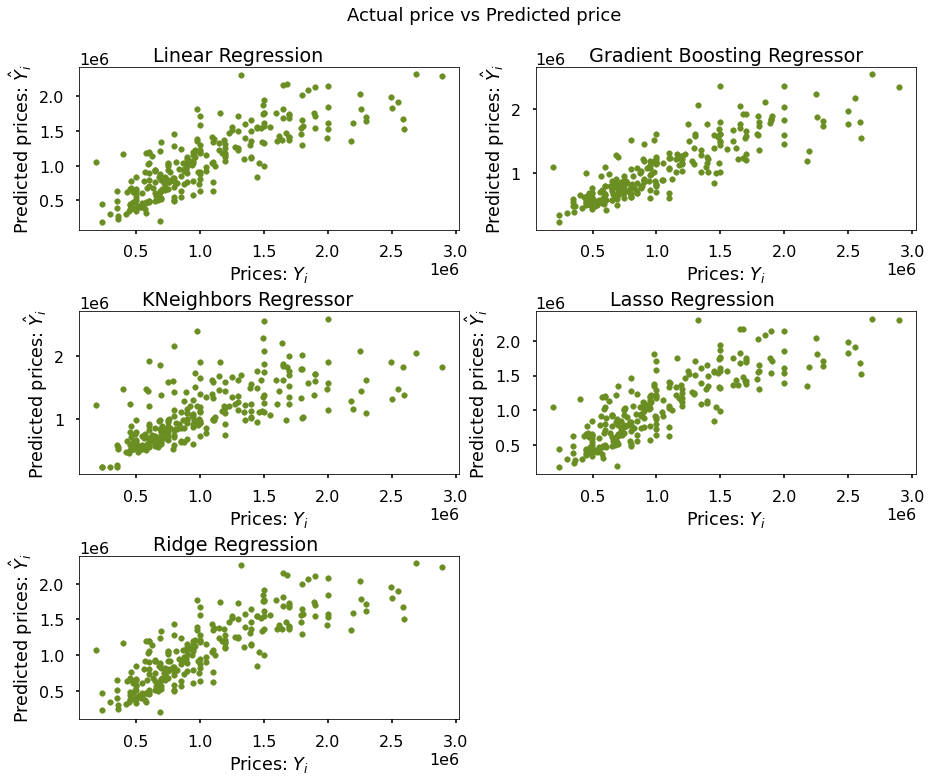

In [97]:
#Actual Price Vs Predicted Price for all models
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Actual price vs Predicted price", fontsize=18, y=0.95)

# loop through tickers and axes
for i, pipe in enumerate(pipelineLst):
    ax = plt.subplot(3, 2, i + 1)
    # chart formatting
    ax.scatter(y_test, pipe.predict(X_test), marker='.', color = 'olivedrab')
    ax.set_xlabel("Prices: $Y_i$")
    ax.set_ylabel("Predicted prices: $\hat{Y}_i$")
    ax.set_title(pipe_dict[i])
    

plt.show()

In [98]:
# Model evaluation in training dataset
for i, model in enumerate(pipelineLst):
    print("{} MAE: {}".format(pipe_dict[i], mean_absolute_error(y_train, model.predict(X_train))),)
    print("{} MSE: {}".format(pipe_dict[i],  mean_squared_error(y_train,  model.predict(X_train))))
    print("{} RMSE: {}".format(pipe_dict[i], np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print("{} R squared: {}".format(pipe_dict[i],  model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    # Calculating Adjusted R-Squared
    num_data_points, num_input_vars = X_test.shape
    adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
    print("{} Adjusted R squared: {}".format(pipe_dict[i], adjusted_r_squared))
    print("\n")

Linear Regression           MAE: 216330.956
Linear Regression           MSE: 87832712756.18266
Linear Regression           RMSE: 296365.8427622567
Linear Regression           R squared: 0.7445160705455786
Linear Regression           Adjusted R squared: 0.649186214847273


Gradient Boosting Regressor MAE: 147928.3091983744
Gradient Boosting Regressor MSE: 45908771618.44439
Gradient Boosting Regressor RMSE: 214263.32308270677
Gradient Boosting Regressor R squared: 0.8664625855054195
Gradient Boosting Regressor Adjusted R squared: 0.7211645531014175


KNeighbors Regressor        MAE: 227555.67386666662
KNeighbors Regressor        MSE: 104864178417.21722
KNeighbors Regressor        RMSE: 323827.38985023677
KNeighbors Regressor        R squared: 0.6949756927648312
KNeighbors Regressor        Adjusted R squared: 0.34070242035763976


Lasso Regression            MAE: 216323.28686312246
Lasso Regression            MSE: 87832250425.21385
Lasso Regression            RMSE: 296365.0627608016
Lasso

In [99]:
# Finding out the model with best test accuracy
best_accuracy = 0.0
best_regression_model = 0
best_pipeline = ""
for i, model in enumerate(pipelineLst):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy = model.score(X_test, y_test)
        best_pipeline = model
        best_regression_model = i
print("Regression Model with best accuracy in test dataset: {}".format(pipe_dict[best_regression_model]))

Regression Model with best accuracy in test dataset: Gradient Boosting Regressor


In [100]:
# Considering best model from above for further prediction
y_pred = pipelineLst[best_regression_model].predict(X_test)

In [101]:
# Creating data frame with listed  price,Predicted price and
pred = pd.DataFrame(pipelineLst[best_regression_model].predict(X_test),index=X_test.index,columns = ['Predicted'])
compare_df = pd.concat((y_test,round(pred)),axis = 1)
compare_df.head(10)

Price  Predicted
632   875000.0   768590.0
687   799000.0   816139.0
833   695000.0   593045.0
182  1799000.0  1804397.0
831   550000.0   566474.0
668   476000.0   492535.0
375  1195000.0  1266159.0
789   499000.0   568429.0
402  1199000.0  1214027.0
599   499000.0   681528.0

In [102]:
# Getting the residuals for test data
residuals = compare_df['Price'] - compare_df['Predicted']
residuals

632    106410.0
687    -17139.0
833    101955.0
182     -5397.0
831    -16474.0
         ...   
188   -261575.0
776     68783.0
950     54076.0
133   -217428.0
566     94537.0
Length: 250, dtype: float64

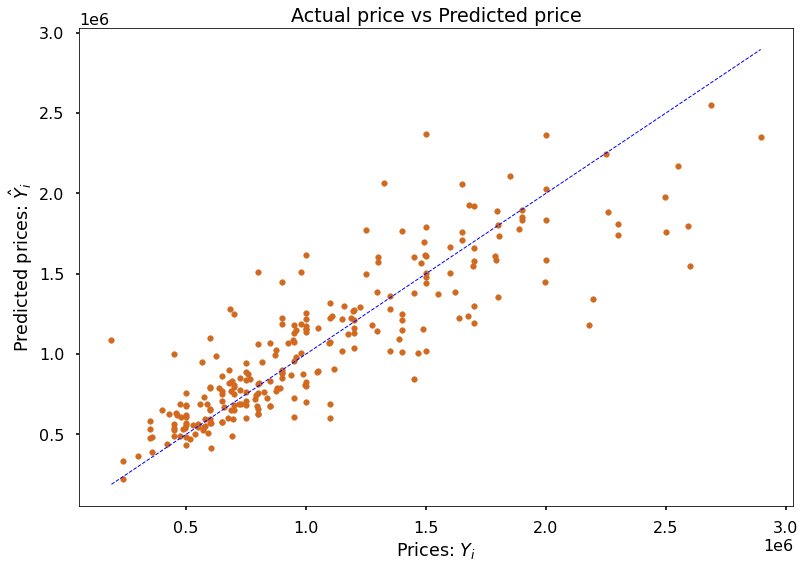

In [103]:
#Actual Price Vs Predicted price
plt.scatter(y_test, y_pred, marker='.', color = 'chocolate')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, color='blue', linestyle='--', )

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual price vs Predicted price")

plt.show()

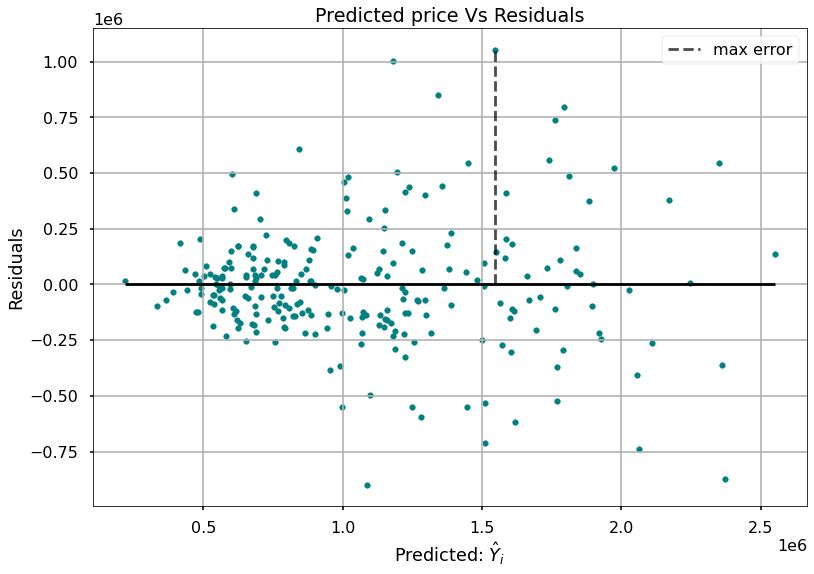

In [104]:
#Predicted Price Vs Residual
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
y_test_1 = y_test[:,np.newaxis]
y_pred_1 = y_pred[:,np.newaxis]
max_true= y_test_1[max_idx]
max_pred =  y_pred_1[max_idx]
plt.scatter(y_pred, residuals,  marker='.', color = 'teal')

plt.vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
plt.hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred), color='black')
plt.grid(True)

plt.xlabel("Predicted: $\hat{Y}_i$")
plt.ylabel("Residuals")
plt.title("Predicted price Vs Residuals")
plt.legend()
plt.show()

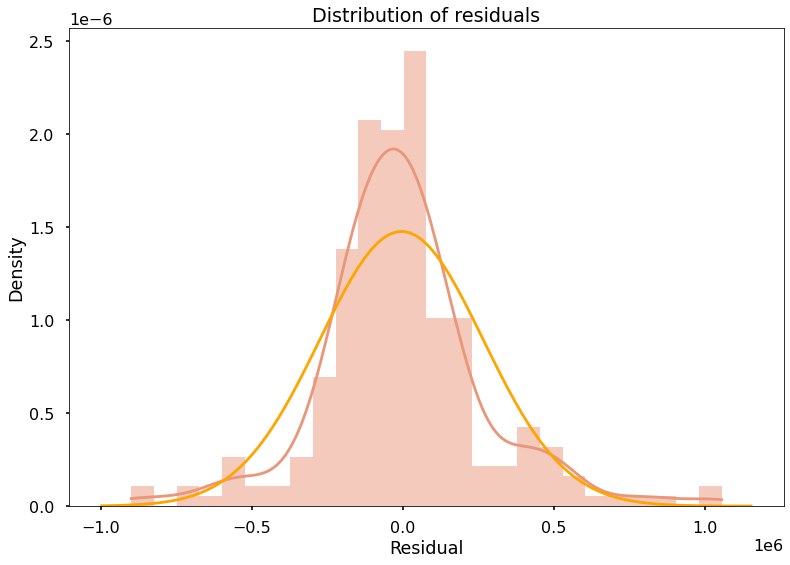

In [105]:
from scipy import stats
import seaborn as sns

mu, std = stats.norm.fit(residuals)
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=residuals, ax=ax, stat="density", linewidth=0, kde=True, color = 'darksalmon')
ax.set(title="Distribution of residuals", xlabel="Residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

### <font color = 'Seagreen'> The gradient Boost Regressor Model has given the best results compared to all the models the dataset was trained and tested on. This model gives the adjusted R-sq value of 72%

### <font color = 'Seagreen'> Further investigation can be done on the model revisting the dataset because below listed features has negative correlation
<ol>
  <font color= "Indigo"><li>Baths</li>
  <li>Livability</li>
  <li>Schools</li>
    <li>Shopping Centers</li>
    <li>Garage</li>
    <li>Pool and few others </li>
</ol>
